## 미니프로젝트
---
### **분석 주제**
```
회사에서 할인마트를 운영하고 있음

최근 매출 증대를 위해 프로모션을 진행해보라는 윗선의 지시가 있었음 😰

이를 위해 자주 판매되는 상품 조합과, 시간별 최빈 판매 상품 및 조합 등을 파악하여,
데이터를 기반으로 한 프로모션 기획서 작성하고자 함
```



### 분석 프레임 정의
----
1. 분석 가설
  * 특정 일, 특정 시간 등에 많이 사는 물건이 있다면, 해당 물건을 사러 왔을때 다른 연관 물건을 사게 만들 수 있도록 결합 할인을 제공하면 매출을 높일 수 있을것이다
  * 항상 사는 물건 세트가 있다면, 해당 세트에 조금의 할인만 제공해도 방문객을 높일 수 있을것이다

2. 분석 대상 정의
  * 2021년 8월 1일부터 8월 30일까지의 매장 영수증 정보 대상
  * 전년도 한 달치 데이터에 대해서만 분석하여 8월 프로모션을 진행하고자 함
  
3. 분석 대상 항목 정의
  * 매장 영수증 정보
    * 영수증 일자
    * 영수증 일시
    * 구매 품목1, 2, 3, ... , 20 (최대 20개)

4. 분석 방법
    1. 데이터 전처리
    2. 데이터 시각화 
      * 영수증 일자/일시를 기준으로 요일별/시간대별 최빈 판매 항목 확인 (*언제 어떤 상품에 대해 많이/적게 팔리는지 시각적으로 확인*)
      * 일부 대량 판매 물품에 대해 요일별/시간대별 차이에 대한 확인 (*많이 팔리는 항목이 요일별/시간대별에 따른 차이가 발생하는지 확인*)
    3. 장바구니 분석
      * 함께 판매되는 경우가 많은 조합 확인 *프로모션 기획에 활용*
        * 모든 사람이 대부분 구매하는 물품을 확인하여 해당 물품이 포함된 조합은 제외하고 분석
        * 유사한 물품 (스파케티, 파스타) 은 하나로 통일하여 추가 검토      * 함께 판매되는 경우가 많은 조합 확인 *프로모션 기획에 활용*
        * 모든 사람이 대부분 구매하는 물품을 확인하여 해당 물품이 포함된 조합은 제외하고 분석
        * 유사한 물품 (스파케티, 파스타) 은 하나로 통일하여 추가 검토


5. 결론
  * 프로모션 계획 수립





### 분석 단계
---
1. 데이터 전처리
2. 데이터 탐색(EDA)
3. 데이터 시각화
4. 장바구니 분석
5. 최종 결론 산출

#### 구글 colab 이용 시 처리

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. 데이터 전처리

In [21]:
import pandas as pd
import seaborn as sns

# 데이터 읽어오기
df = pd.read_csv("market_basket_prj_v1.csv")

In [22]:
# 컬럼 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120016 entries, 0 to 120015
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sale_date  120016 non-null  int64 
 1   sale_time  120016 non-null  object
 2   0          120016 non-null  object
 3   1          93995 non-null   object
 4   2          71738 non-null   object
 5   3          54772 non-null   object
 6   4          41382 non-null   object
 7   5          30555 non-null   object
 8   6          22427 non-null   object
 9   7          16112 non-null   object
 10  8          10809 non-null   object
 11  9          6618 non-null    object
 12  10         4240 non-null    object
 13  11         2546 non-null    object
 14  12         1453 non-null    object
 15  13         784 non-null     object
 16  14         422 non-null     object
 17  15         138 non-null     object
 18  16         66 non-null      object
 19  17         64 non-null      object
 20  18  

In [23]:
# 간단한 데이터 탐색 - eye check
df.head(5)

,sale_date,sale_time,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,20210801,10:01,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210801,10:01,cooking oil,frozen smoothie,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210801,10:01,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210801,10:01,spaghetti,mineral water,eggs,pet food,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210801,10:01,frozen vegetables,parmesan cheese,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 날짜 확인 - 날짜 값에 대해서 빈도수 계산 후, 정렬 -> 2021년 8월 한 달간의 데이터가 맞는지 확인
df['sale_date'].value_counts().sort_index() 

20210801    6652
20210802    3044
20210803    3052
20210804    2927
20210805    2749
20210806    5169
20210807    4563
20210808    4611
20210809    1961
20210810    4208
20210811    2687
20210812    3019
20210813    5567
20210814    5781
20210815    4555
20210816    4465
20210817    2849
20210818    1880
20210819    3450
20210820    4927
20210821    5221
20210822    4003
20210823    3036
20210824    3265
20210825    3309
20210826    2852
20210827    4143
20210828    4405
20210829    4954
20210830    2935
20210831    3777
Name: sale_date, dtype: int64

In [25]:
# 날짜/시간에 대한 확인 - 간단히 보기 위하여 날짜는 마지막 두자리만, 시각은 앞 두자리만
# 날짜 항목은 숫자로 읽혔기 때문에 (상기 info() 결과 확인) 문자열 자르기가 되지 않으므로 str로 형 변환 후 자르기 수행
df['sale_date_day'] = df['sale_date'].astype(str).str[-2:]
df['sale_time_hour'] = df['sale_time'].str[:2]

<AxesSubplot:xlabel='sale_date_day', ylabel='Count'>

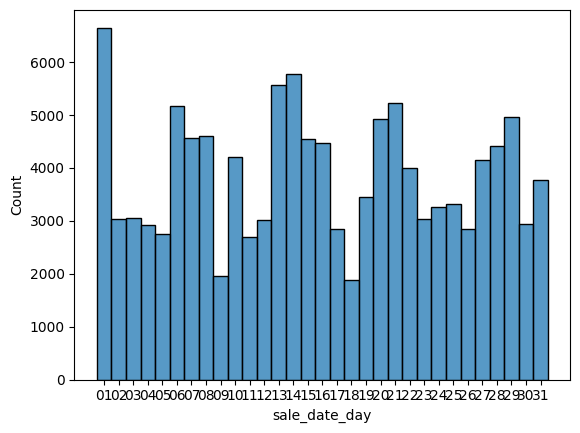

In [26]:
sns.histplot(data=df, x='sale_date_day')

<AxesSubplot:xlabel='sale_time_hour', ylabel='Count'>

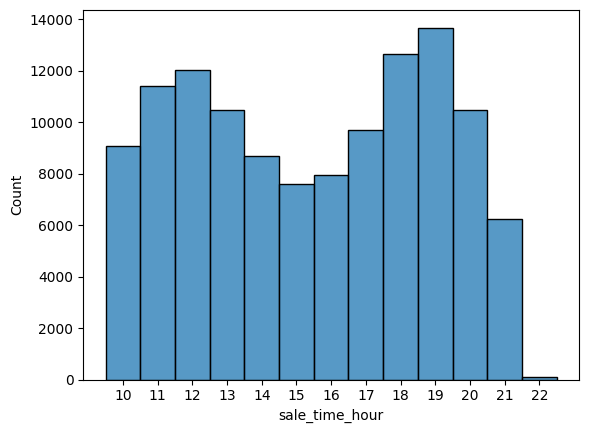

In [27]:
sns.histplot(data=df, x='sale_time_hour')

#### 기타 전처리 작업 수행
* 결측값 확인 (원래 해야 하지만..)
* 날짜 항목에 대한 전처리
  * 문자열화 or datetime 형으로 변환 -> 이후 요일 등으로 처리 가능
* 시간 항목에 대한 전처리 
  * 시간만 남기거나, 시간대로 만들거나 분석에 활용할 수준으로 변경
* 구매 물품에 대한 전처리
  * 분석 강의를 참고 하여 컬럼 형태로 변환

#### (1) 결측값 확인

In [28]:
df.isnull().sum()

sale_date              0
sale_time              0
0                      0
1                  26021
2                  48278
3                  65244
4                  78634
5                  89461
6                  97589
7                 103904
8                 109207
9                 113398
10                115776
11                117470
12                118563
13                119232
14                119594
15                119878
16                119950
17                119952
18                119966
19                120000
sale_date_day          0
sale_time_hour         0
dtype: int64

모든 데이터에 날짜와 시간 정보가 기입되어 있으며, 1개 이상의 물건을 산 기록이 있다.

#### (2) 날짜 항목 Datetime으로 변경 후 요일 정보 추출

In [29]:
import datetime
df['sale_date'] = pd.to_datetime(df['sale_date'], format = "%Y%m%d")

In [30]:
dateDict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
def extract_day(date):
    return dateDict[date.weekday()]
df['sale_day'] = df['sale_date'].map(extract_day)
df['sale_day'][:5]

0    Sunday
1    Sunday
2    Sunday
3    Sunday
4    Sunday
Name: sale_day, dtype: object

#### (3) 구매 물품에 대한 전처리

In [31]:
from mlxtend.preprocessing import TransactionEncoder

In [44]:
dataset =  df.iloc[:, 2:22].T.apply(lambda x: x.dropna().tolist()).tolist()
te = TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)
association_data = pd.DataFrame(te_ary, columns=te.columns_)
association_data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 2. 데이터 탐색
* 물품 수, 물품별 빈도 등에 대한 탐색
  * 요일별로, 시간대별로 처리 가능한지
  * 처리 가능하다면 어떤 기준으로 데이터 빈도가 나타나는지

* 물품명에 대한 탐색
  * 유사한 물품명이 없는지 - 이를 묶을 수 있는 기준이 있을지

In [60]:
association_data['sale_day'] = df['sale_day']
association_data['sale_time_hour'] = df['sale_time_hour']

#### (1) 요일 별 데이터 탐색 (요일을 입력받아 해당 요일 데이터만 추출하는 함수 생성)

In [61]:
def choose_saleday(saleday):
    return association_data.loc[association_data['sale_day'] == saleday, :].reset_index(drop = True)

##### 요일 별 물품 수 데이터 빈도

In [62]:
monday = choose_saleday('Monday')
monday.iloc[:,:-2].sum()

 asparagus             2
almonds              316
antioxydant juice    140
asparagus             75
avocado              525
                    ... 
whole wheat pasta    437
whole wheat rice     898
yams                 155
yogurt cake          420
zucchini             143
Length: 120, dtype: int64

#### (2) 시간대 별 데이터 탐색 (시간대를 입력받아 해당 요일 데이터만 추출하는 함수 생성)

In [63]:
def choose_saletime(sale_time_hour):
    return association_data.loc[association_data['sale_time_hour'] == sale_time_hour, :].reset_index(drop = True)

##### 시간대 별 물품 수 데이터 빈도

In [64]:
hour_10 = choose_saletime('10')
hour_10.iloc[:,:-2].sum()

 asparagus             0
almonds              183
antioxydant juice     83
asparagus             47
avocado              305
                    ... 
whole wheat pasta    257
whole wheat rice     514
yams                 107
yogurt cake          235
zucchini              79
Length: 120, dtype: int64

### 3. 데이터 시각화
* 날짜/요일/시간대별 방문객수
  * 최다 구매 물품
* 물품별 구매 건수
  * 날짜/요일별 트렌드

#### (1) 날짜/요일/시간대별 방문객수

In [65]:
import matplotlib.pyplot as plt

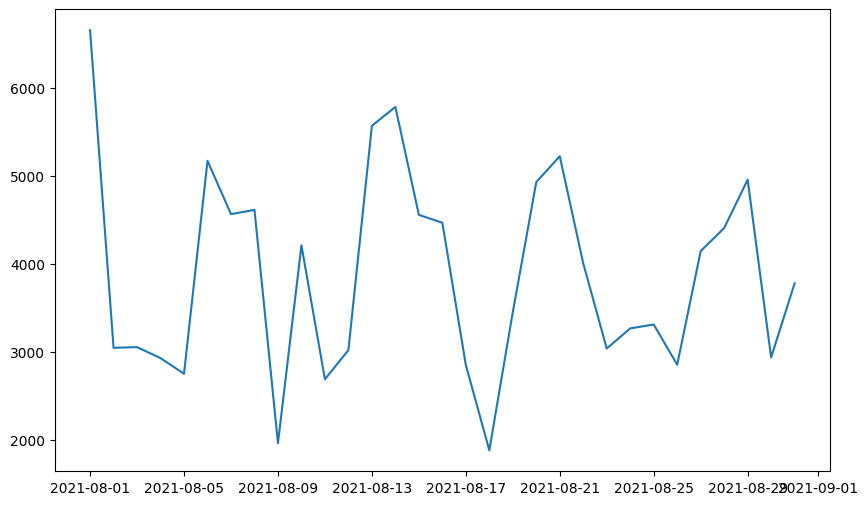

In [72]:
### 날짜별 방문객 수 
plt.figure(figsize=(10,6))
plt.plot(df.groupby(['sale_date'])['0'].count())

<AxesSubplot:xlabel='sale_day', ylabel='count'>

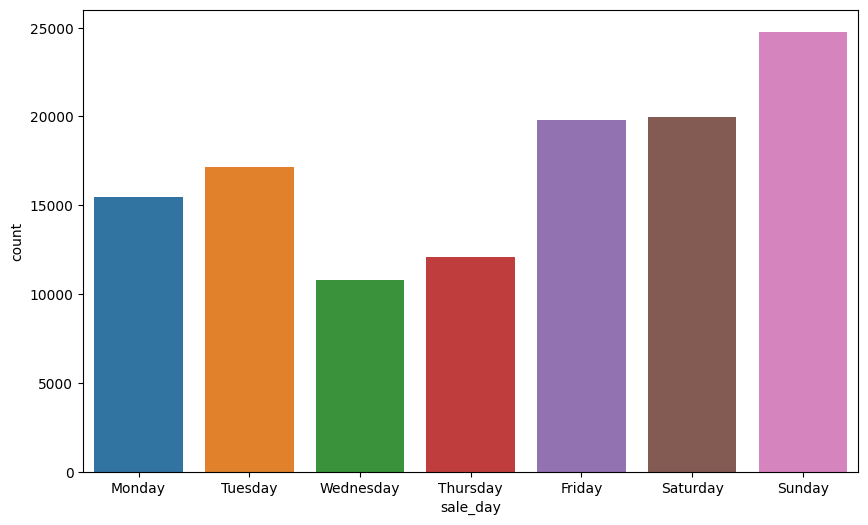

In [76]:
### 요일별 방문객 수 
plt.figure(figsize=(10,6))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x = "sale_day", data = df, order = day_order)

<AxesSubplot:xlabel='sale_time_hour', ylabel='count'>

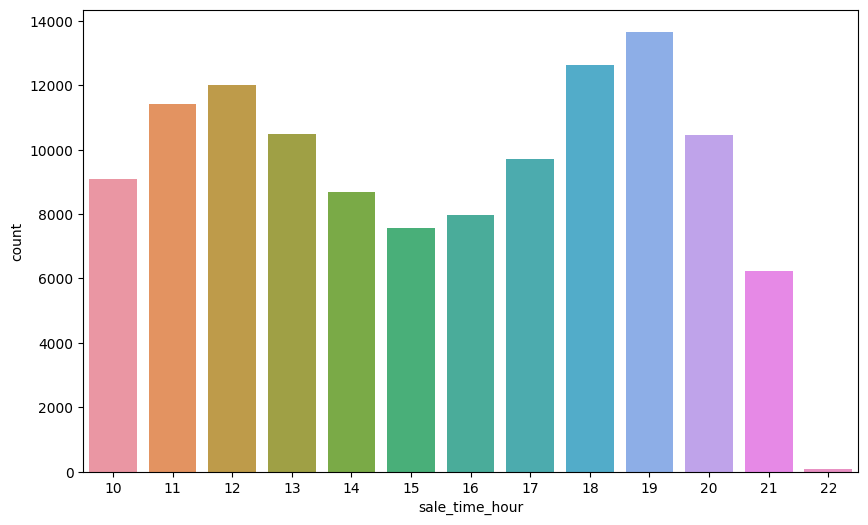

In [78]:
### 시간대별 방문객 수 
plt.figure(figsize=(10,6))
sns.countplot(x = "sale_time_hour", data = df)

#### 물품별 구매 건수의 날짜/요일별 트렌드

In [79]:
association_data['sale_date'] = df['sale_date']

Text(0.5, 1.0, 'avocado')

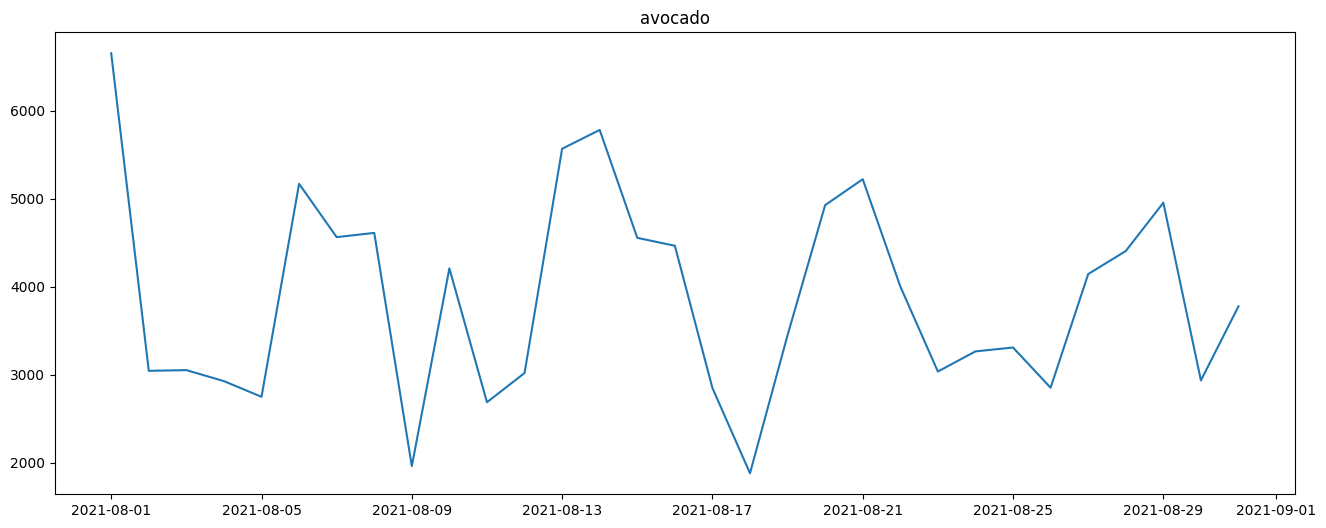

In [82]:
product = 'avocado'

plt.figure(figsize=(16,6))
plt.plot(association_data.groupby(['sale_date'])[product].count())
plt.title(product)

Text(0.5, 1.0, 'avocado')

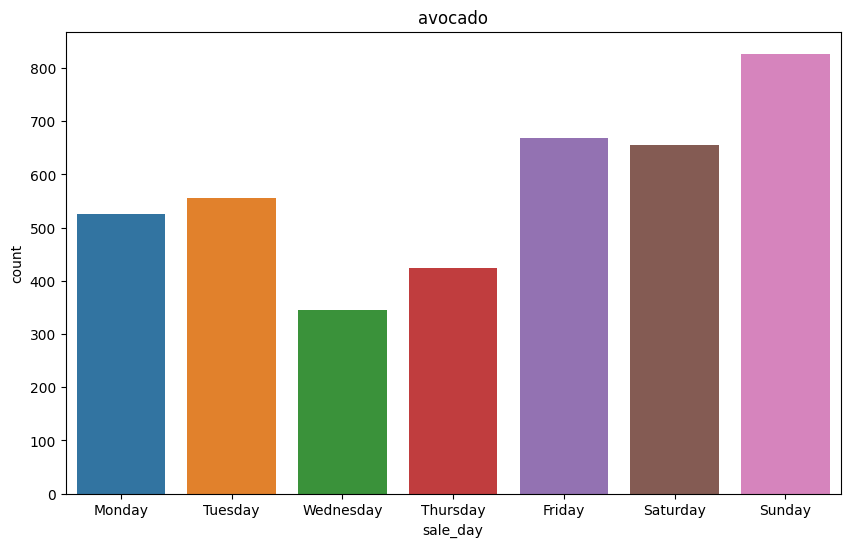

In [84]:
plt.figure(figsize=(10,6))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x = "sale_day", data = association_data.loc[association_data[product] == True, :], order = day_order)
plt.title(product)

4. 장바구니 분석
* 8월 전체 영수증을 기준으로 분석
  * support 기준 값을 어떤식으로 선정할지
  * 어떤 기준으로 연관 아이템을 찾을 지 (lift 기준, confidence 기준, support 기준)
  * 왜 그렇게 선정했는지
  * 항상 사는 물건(물)에 대해서는 어떤식으로 처리하는 것이 좋을지
* 요일별 데이터를 기준으로 분석
* 시간대별 데이터를 기준으로 분석


In [85]:
from mlxtend.frequent_patterns import apriori

##### 관측치 수가 굉장히 많으므로, 최소 support 수는 0.01로 설정한다.

In [97]:
itemset = apriori(association_data.iloc[:, :-3], min_support=0.01, use_colnames=True)
itemset

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.013198,(bacon)
3,0.010799,(barbecue sauce)
4,0.014265,(black tea)
...,...,...
257,0.011207,"(milk, mineral water, ground beef)"
258,0.017239,"(spaghetti, mineral water, ground beef)"
259,0.015731,"(milk, spaghetti, mineral water)"
260,0.010265,"(spaghetti, mineral water, olive oil)"


##### 신뢰도가 충분한 규칙을 발견하기 위해서 confidence threshold를 0.3로 설정하고, 좋은 규칙을 찾기 위해 Lift로 내림차순 정렬한다.

In [104]:
from mlxtend.frequent_patterns import association_rules
association_rules(itemset, metric="confidence", min_threshold=0.3).sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(herb & pepper),(ground beef),0.049460,0.101945,0.016140,0.326314,3.200891,0.011097,1.333047
52,"(mineral water, frozen vegetables)",(milk),0.035729,0.129583,0.011065,0.309701,2.389991,0.006435,1.260929
57,"(mineral water, ground beef)",(spaghetti),0.041694,0.174110,0.017239,0.413469,2.374757,0.009980,1.408093
23,(soup),(milk),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861
17,(ground beef),(spaghetti),0.101945,0.174110,0.039770,0.390110,2.240595,0.022020,1.354163
...,...,...,...,...,...,...,...,...,...
11,(frozen smoothie),(mineral water),0.063325,0.238368,0.020264,0.320000,1.342461,0.005169,1.120047
20,(honey),(mineral water),0.047460,0.238368,0.015065,0.317416,1.331619,0.003752,1.115806
21,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585
10,(fresh bread),(mineral water),0.043061,0.238368,0.013332,0.309598,1.298820,0.003067,1.103171


##### 가장 고객이 적었던 수요일에 대한 장바구니 분석

In [106]:
wednesday = choose_saleday('Wednesday')
itemset = apriori(wednesday.iloc[:, :-3], min_support=0.01, use_colnames=True)
association_rules(itemset, metric="confidence", min_threshold=0.3).sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(herb & pepper),(ground beef),0.050634,0.098213,0.015922,0.314442,3.201622,0.010949,1.315406
24,(whole wheat pasta),(milk),0.030825,0.131352,0.010553,0.342342,2.606289,0.006504,1.320820
57,"(mineral water, ground beef)",(spaghetti),0.040267,0.171526,0.017310,0.429885,2.506232,0.010403,1.453169
52,"(mineral water, frozen vegetables)",(milk),0.035916,0.131352,0.011293,0.314433,2.393812,0.006576,1.267050
17,(ground beef),(spaghetti),0.098213,0.171526,0.039711,0.404336,2.357278,0.022865,1.390839
...,...,...,...,...,...,...,...,...,...
10,(fresh bread),(mineral water),0.042766,0.240304,0.013422,0.313853,1.306068,0.003145,1.107192
11,(frozen smoothie),(mineral water),0.063686,0.240304,0.019717,0.309593,1.288341,0.004413,1.100360
8,(cottage cheese),(mineral water),0.032954,0.240304,0.010090,0.306180,1.274137,0.002171,1.094947
33,(turkey),(mineral water),0.062298,0.240304,0.019069,0.306092,1.273772,0.004098,1.094809


### 결과

* 시각화 결과 및 장바구니 분석 결과를 결합하여 가설에 따라 특정 상품 및 세트의 프로모션 기획한 결과

* 해당 기획을 어떤 데이터 분석 결과에 기반하여 진행하였는지 논리적인 흐름 필요


시각화 결과, 수목 요일에는 고객의 수가 적어, 주로 주말에 프로모션을 기획하는 것이 좋아보임.
또한 프로모션은 낮 12시와 오후 7시 근방에 진행하는 것이 가장 효율이 높다.
장바구니 분석 결과, hurb와 pepper를 구입한 고객은 높은 가능성으로 ground beef를 함께 구입하는 경향이 있다.
따라서 이 두 제품의 결합 상품을 판매하면 높은 프로모션 효과를 얻을 수 있을 것으로 기대된다.
더 나아가, 요일별 다른 프로모션을 기획하는 것 또한 중요하다.
예를 들어, 고객이 가장 적게 방문하는 수요일에는 whole wheat pasta를 구매하는 고객은 milk를 함께 구매하는데, 이를 요일 프로모션을 활용하면 높은 성공을 기대할 수 있다.
